<a href="https://colab.research.google.com/github/Safirap/Project/blob/main/Prediksi_Pergerakan_Harga_Saham_Unilever_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import Library

In [79]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
from scipy.stats import kstest
%matplotlib inline

#2.Import Data

In [80]:
data = pd.read_csv('https://raw.githubusercontent.com/Safirap/Data/main/Harga%20Saham%20UNVR.JK.csv',sep=',')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-02,8360.0,8570.0,8360.0,8570.0,8016.214844,9898000
1,2019-12-03,8530.0,8560.0,8420.0,8535.0,8064.402832,6575000
2,2019-12-04,8520.0,8520.0,8390.0,8400.0,7936.846680,8455000
3,2019-12-05,8400.0,8500.0,8400.0,8430.0,7965.192383,5020000
4,2019-12-06,8420.0,8460.0,8400.0,8450.0,7984.088867,6634500
...,...,...,...,...,...,...,...
503,2021-12-24,4090.0,4210.0,4080.0,4200.0,4200.000000,11979500
504,2021-12-27,4200.0,4230.0,4170.0,4210.0,4210.000000,7238100
505,2021-12-28,4210.0,4230.0,4180.0,4180.0,4180.000000,7006900
506,2021-12-29,4180.0,4190.0,4120.0,4120.0,4120.000000,9030700


#3.Data Prepocessing

In [81]:
data.shape

(508, 7)

terdapat 508 baris dan 7 kolom

In [82]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Seleksi Kolom

In [83]:
data2 = data[['Date', 'Adj Close']]
data2

,Date,Adj Close
0,2019-12-02,8016.214844
1,2019-12-03,8064.402832
2,2019-12-04,7936.846680
3,2019-12-05,7965.192383
4,2019-12-06,7984.088867
...,...,...
503,2021-12-24,4200.000000
504,2021-12-27,4210.000000
505,2021-12-28,4180.000000
506,2021-12-29,4120.000000


Visualisasi pergerakan saham UNVR.JK

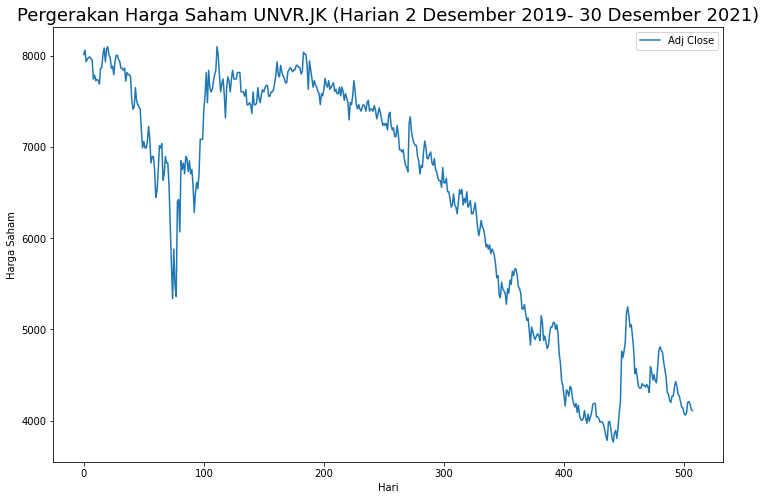

In [84]:
data2.plot(figsize = (12,8))
plt.title('Pergerakan Harga Saham UNVR.JK (Harian 2 Desember 2019- 30 Desember 2021)', fontsize = 18)
plt.ylabel('Harga Saham')
plt.xlabel('Hari')
plt.show()

dari grafik diatas terlihat bahwa harga saham mengalami penurunan

#4.Pemodelan Pergerakan saham menggunakan Simulasi Monte Carlo

##4.1.Menghitung return harian

In [85]:
return_daily = data2['Adj Close'].pct_change().dropna()
return_daily

1      0.006011
2     -0.015817
3      0.003571
4      0.002372
5      0.000592
         ...   
503    0.029412
504    0.002381
505   -0.007126
506   -0.014354
507   -0.002427
Name: Adj Close, Length: 507, dtype: float64

Visualisasi return harian

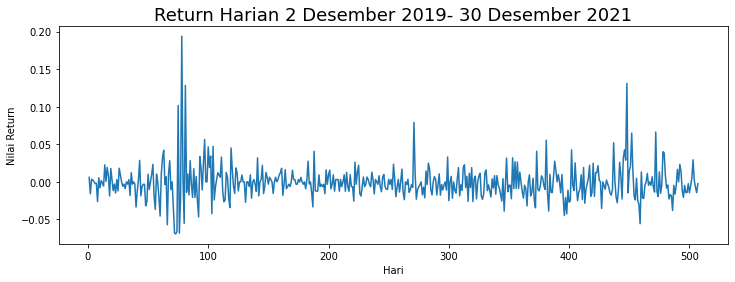

In [129]:
return_daily.plot(figsize = (12,4))
plt.title('Return Harian 2 Desember 2019- 30 Desember 2021', fontsize = 18)
plt.ylabel('Nilai Return')
plt.xlabel('Hari')
plt.show()

uji normalitas return saham

In [87]:
ksdata = kstest(return_daily, 'norm')
print(ksdata)

KstestResult(statistic=0.47240297765774203, pvalue=2.3079635410720417e-104)


##4.2.Estimasi Parameter Model

###1.Mencari mean

In [88]:
u = return_daily.mean()
u

-0.00106293579493073

###2.Mencari Variansi

In [89]:
var = return_daily.var()
var

0.000523318320501235

Menghitung Drift

In [90]:
drift = u - (0.5 * var)
drift

-0.0013245949551813475

###3.Menghitung standar Deviasi

In [91]:
stdev = return_daily.std()
stdev

0.02287615178523772

In [92]:
t_interval = 10
iteration = 1

In [93]:
norm.ppf(np.random.rand(t_interval,iteration))


array([[-1.06865336],
       [ 1.29499263],
       [-1.97940738],
       [-0.6909778 ],
       [-0.04930159],
       [-1.14120651],
       [ 1.1089294 ],
       [ 0.94563074],
       [-0.32456063],
       [-0.04220562]])

Menghitung Pergerakan Harian e^r

e merupakan bilangan euler (2,718281828) dan r merupakan penjumlahan dari Drift dan Random Component


In [94]:
return_daily_e = np.exp(drift + stdev *norm.ppf(np.random.rand(t_interval,iteration)))
return_daily_e

array([[0.978062  ],
       [0.98036895],
       [0.98013444],
       [1.0025615 ],
       [1.05136385],
       [1.00065299],
       [1.03397869],
       [0.99280712],
       [1.01422152],
       [0.97789271]])

In [95]:
return_daily_e.shape

(10, 1)

##4.3.Menghitung harga saham dan akurasi model

In [96]:
S0 = data2['Adj Close'].iloc[-1]
S0

4110.0

In [97]:
price_list = np.zeros_like(return_daily_e)
price_list

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [98]:
price_list[0] = S0
price_list

array([[4110.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.]])

Perkiraan harga saham untuk 10 hari kedepan

In [99]:
for t in range(1, t_interval):
    price_list[t] = price_list[t - 1] * return_daily_e[t]
price_list

array([[4110.        ],
       [4029.31639908],
       [3949.27179168],
       [3959.38784176],
       [4162.75723224],
       [4165.47548496],
       [4307.0128992 ],
       [4276.03306685],
       [4336.84477282],
       [4240.96887954]])

Menghitung akurasi model

In [114]:
actual = [4230,4250,4210,4230,4220,4250,4180,4330,4270,4220]
pred =[4110 ,4029.31639908,3949.27179168,3959.38784176,4162.75723224,
       4165.47548496,4307.0128992,4276.03306685,4336.84477282,4240.96887954]

In [115]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual))*100

In [122]:
mape(actual, pred)

3.03125100234538

In [103]:
!pip install tabulate
from tabulate import tabulate


In [128]:
Hasil = {'Tanggal':['2022-01-03','2022-01-04','2022-01-05',
                    '2022-01-06','2022-01-07','2022-01-10','2022-01-11',
                    '2022-01-12','2022-01-13','2022-01-14'],
         'Actual' : [4230,4250,4210,4230,4220,4250,4180,4330,4270,4220],
         'Pred':[4110 ,4029.31639908,3949.27179168,3959.38784176,4162.75723224,
                 4165.47548496,4307.0128992,4276.03306685,4336.84477282,4240.96887954]}
df = pd.DataFrame(Hasil)

df.head

<bound method NDFrame.head of       Tanggal  Actual         Pred
0  2022-01-03    4230  4110.000000
1  2022-01-04    4250  4029.316399
2  2022-01-05    4210  3949.271792
3  2022-01-06    4230  3959.387842
4  2022-01-07    4220  4162.757232
5  2022-01-10    4250  4165.475485
6  2022-01-11    4180  4307.012899
7  2022-01-12    4330  4276.033067
8  2022-01-13    4270  4336.844773
9  2022-01-14    4220  4240.968880>

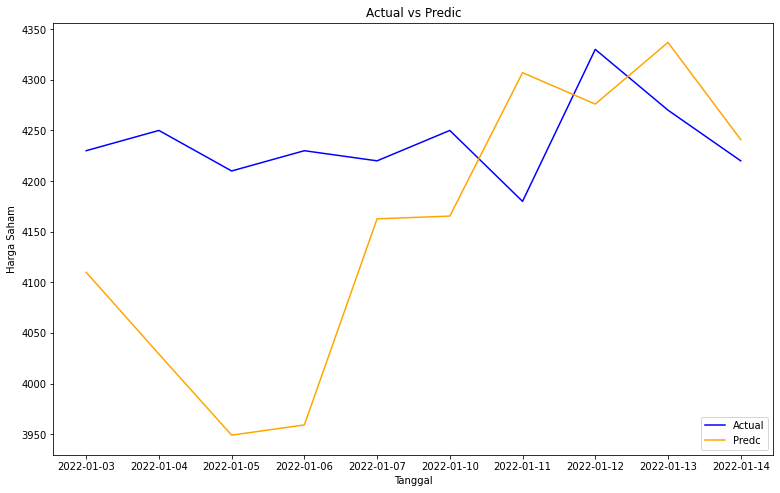

In [121]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_axes([0,0,1,1])

ax1.set_title('Actual vs Predic')

ax1.plot(df['Tanggal'],
         df['Actual'],
         color='blue')

ax1.plot(df['Tanggal'],
         df['Pred'],
         color='orange')

plt.ylabel("Harga Saham", fontsize = 10)
plt.xlabel("Tanggal", fontsize = 10)
plt.legend(['Actual', 'Predc'], loc=4)

plt.show()


#5.Prediksi tiga tahun kedepan

In [123]:
t_interval = 1095
iteration = 1

In [124]:
norm.ppf(np.random.rand(t_interval,iteration))

array([[-0.75571597],
       [ 0.74186525],
       [-0.44051364],
       ...,
       [ 0.56587879],
       [-0.70010701],
       [ 0.98964809]])

In [125]:
return_daily_e_pred = np.exp(drift + stdev *norm.ppf(np.random.rand(t_interval,iteration)))
return_daily_e_pred

array([[1.04425602],
       [0.95405524],
       [1.02139838],
       ...,
       [1.00564328],
       [1.03522706],
       [0.98886809]])

In [126]:
S0 = data2['Adj Close'].iloc[-1]
price_list_pred= np.zeros_like(return_daily_e_pred)
price_list_pred[0] = S0
for t in range(1, t_interval):
    price_list_pred[t] = price_list_pred[t - 1] * return_daily_e_pred[t]
price_list_pred


array([[4110.        ],
       [3921.16705122],
       [4005.0736651 ],
       ...,
       [ 414.92858345],
       [ 429.54529669],
       [ 424.7636379 ]])

Visualisasi Pergerakan Saham

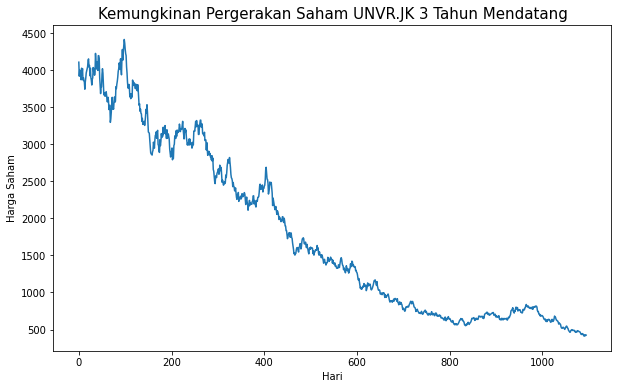

In [127]:
plt.figure(figsize=(10,6))
plt.plot(price_list_pred)
plt.title("Kemungkinan Pergerakan Saham UNVR.JK 3 Tahun Mendatang", fontsize = 15)
plt.ylabel("Harga Saham", fontsize = 10)
plt.xlabel("Hari", fontsize = 10)
plt.show()